In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [195]:
df.

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [197]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [198]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [199]:
df.duplicated().sum()

0

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


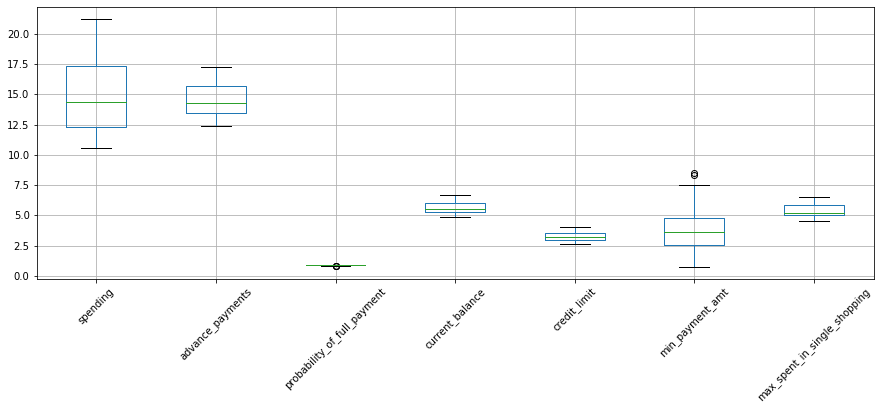

In [201]:
df.boxplot(figsize=(15,5),rot=45)

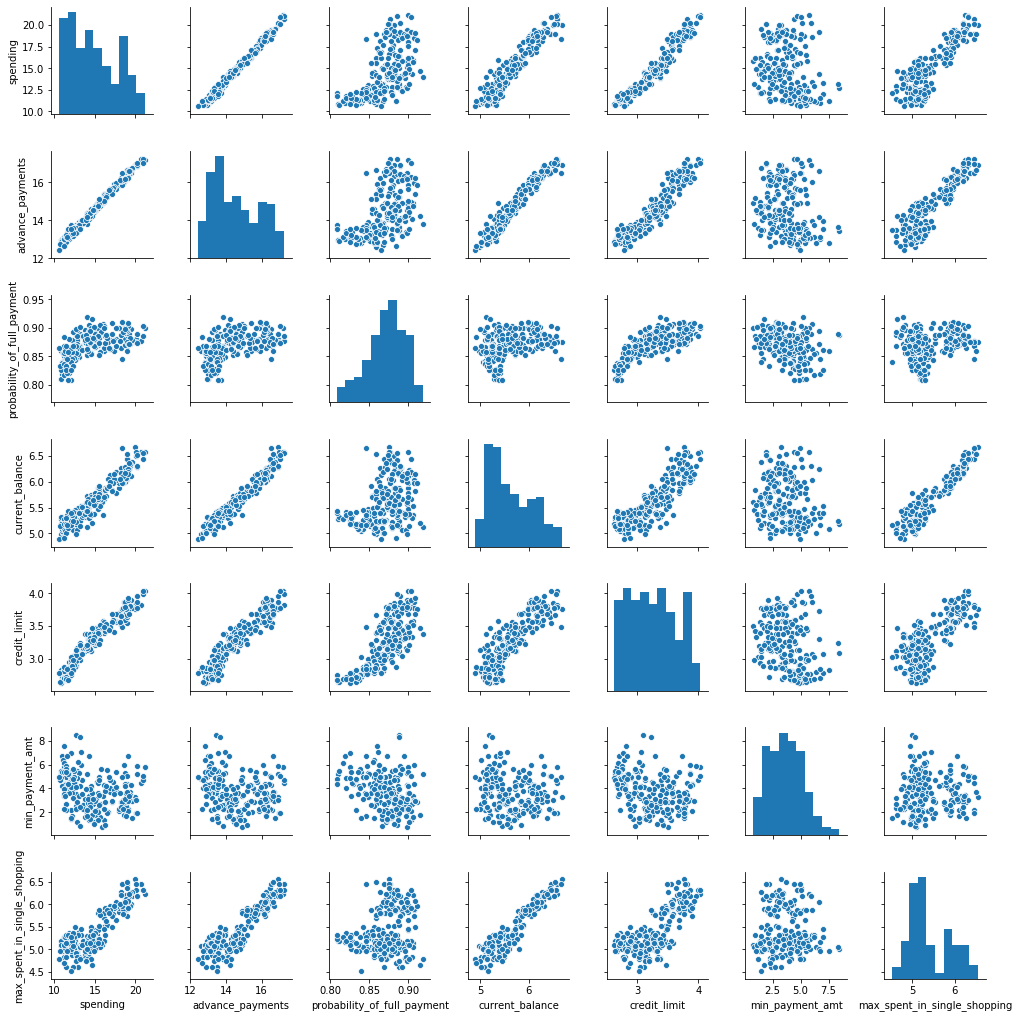

In [202]:
sns.pairplot(df,height =2)

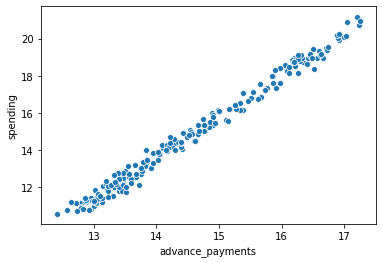

In [203]:
sns.scatterplot(x=df['advance_payments'],y=df['spending'])

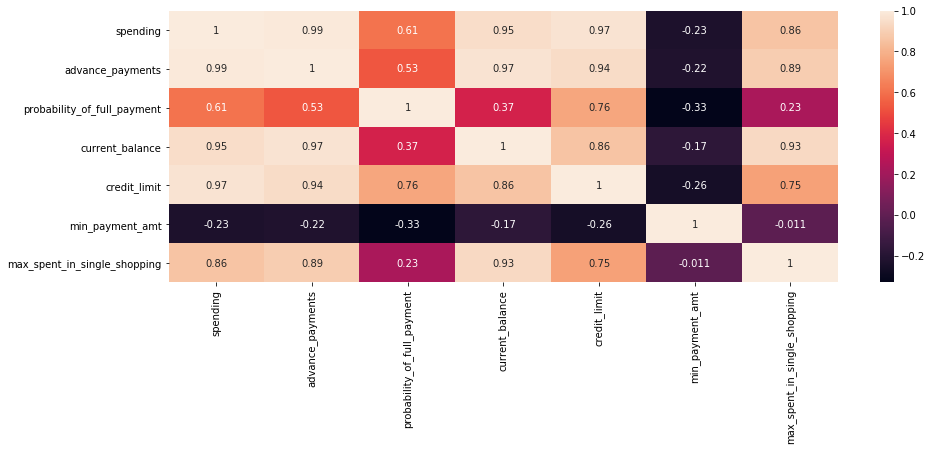

In [204]:

plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot=True)


In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
X = StandardScaler()

In [207]:
scaled_df = X.fit_transform(df)

In [208]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [209]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [210]:
wardlink = linkage(scaled_df, method = 'ward')

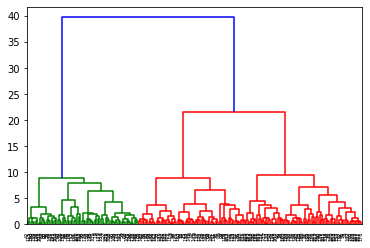

In [211]:
dend = dendrogram(wardlink)

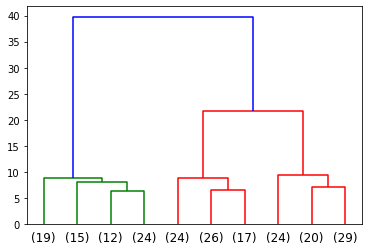

In [212]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [213]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [214]:
from scipy.cluster.hierarchy import fcluster

In [215]:
clusters = fcluster(wardlink, 22, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [216]:
df['clusters'] = clusters

In [217]:
print(df[df['clusters']==1].max(),df[df['clusters']==1].min())

spending                        21.1800
advance_payments                17.2500
probability_of_full_payment      0.9108
current_balance                  6.6750
credit_limit                     4.0330
min_payment_amt                  6.6820
max_spent_in_single_shopping     6.5500
clusters                         1.0000
dtype: float64 spending                        15.3800
advance_payments                14.8600
probability_of_full_payment      0.8452
current_balance                  5.7090
credit_limit                     3.2680
min_payment_amt                  1.4720
max_spent_in_single_shopping     5.4430
clusters                         1.0000
dtype: float64


In [218]:
print(df[df['clusters']==2].max(),df[df['clusters']==2].min())

spending                        16.6300
advance_payments                15.4600
probability_of_full_payment      0.9183
current_balance                  6.0530
credit_limit                     3.5820
min_payment_amt                  8.4560
max_spent_in_single_shopping     5.8790
clusters                         2.0000
dtype: float64 spending                        10.5900
advance_payments                12.4100
probability_of_full_payment      0.8081
current_balance                  4.8990
credit_limit                     2.6300
min_payment_amt                  0.7651
max_spent_in_single_shopping     4.5190
clusters                         2.0000
dtype: float64


cluster 2 has lower range of values for spending, advance payment, max_spent_in_single shopping, credit limit, current balance compared to cluster 1

The above steps are repeated after dropping the spending variable

In [220]:
c_df = df.drop(['spending'], axis=1)

In [221]:
scaled_df = X.fit_transform(c_df)

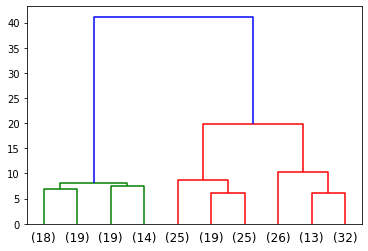

In [222]:
wardlink = linkage(scaled_df, method = 'ward')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [223]:
clusters = fcluster(wardlink, 2, criterion='maxclust')

In [224]:
c_df['clusters'] = clusters
c_df

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...
205,14.02,0.8880,5.439,3.199,3.986,4.738,2
206,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.16,0.8796,5.438,3.201,1.717,5.001,2
208,15.00,0.9000,5.709,3.485,2.270,5.443,1


In [245]:
print("                                  MAX")
print(c_df[c_df['clusters']==1].max())
print("                                  MIN")
print(c_df[c_df['clusters']==1].min())

                                  MAX
advance_payments                17.2500
probability_of_full_payment      0.9108
current_balance                  6.6750
credit_limit                     4.0330
min_payment_amt                  6.6820
max_spent_in_single_shopping     6.5500
clusters                         1.0000
dtype: float64
                                  MIN
advance_payments                14.8600
probability_of_full_payment      0.8452
current_balance                  5.7090
credit_limit                     3.2680
min_payment_amt                  1.4720
max_spent_in_single_shopping     5.4430
clusters                         1.0000
dtype: float64


In [246]:
print("                                  MAX")

print(c_df[c_df['clusters']==2].max())
print("                                  MIN")

print(c_df[c_df['clusters']==2].min())

                                  MAX
advance_payments                15.4600
probability_of_full_payment      0.9183
current_balance                  6.0530
credit_limit                     3.5820
min_payment_amt                  8.4560
max_spent_in_single_shopping     5.8790
clusters                         2.0000
dtype: float64
                                  MIN
advance_payments                12.4100
probability_of_full_payment      0.8081
current_balance                  4.8990
credit_limit                     2.6300
min_payment_amt                  0.7651
max_spent_in_single_shopping     4.5190
clusters                         2.0000
dtype: float64


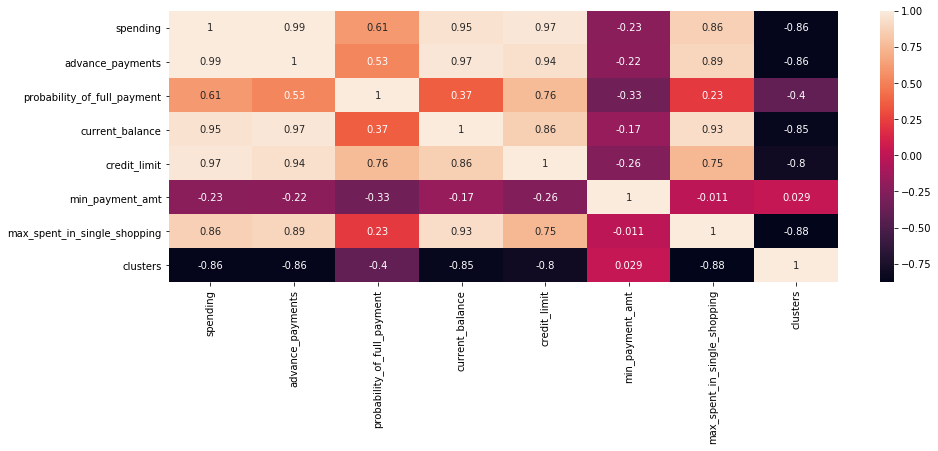

In [227]:
plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot=True)

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [228]:
k_means = KMeans(n_clusters = 2)

In [229]:
wss =[] 
scaled_df = X.fit_transform(df)

In [230]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    

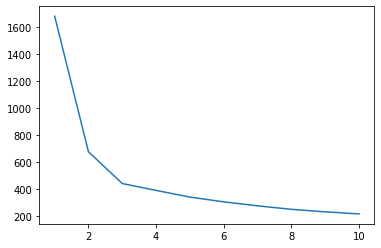

In [231]:
plt.plot(range(1,11), wss)

In [232]:
wss

[1679.9999999999998,
 674.3326593640827,
 438.66387002269283,
 387.71123122219547,
 338.20914097988583,
 302.7431339414943,
 273.34094866559207,
 247.29243425475408,
 228.63323289905486,
 213.27448157104973]

In [233]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

In [234]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_width = silhouette_samples(scaled_df,labels)
silhouette_score(scaled_df,labels)

0.5255986445351128

In [235]:
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [236]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1


In [237]:
df['clusters_KMeans'] = labels
df["sil_width"] = sil_width



,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters_KMeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.641354
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0.205183
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.718852
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.516077
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.589411
...,...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2,0,0.523701
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1,1,0.474428
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2,0,0.493851
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,1,0.315554


In [253]:
cf = df.drop(['spending'], axis=1)

In [254]:
print("                                  MAX")

print(cf[cf['clusters_KMeans']==0].max())
print("                                  MIN")

print(cf[cf['clusters_KMeans']==0].min())

                                  MAX
advance_payments                15.270000
probability_of_full_payment      0.918300
current_balance                  5.920000
credit_limit                     3.582000
min_payment_amt                  8.456000
max_spent_in_single_shopping     5.879000
clusters                         2.000000
clusters_KMeans                  0.000000
sil_width                        0.644635
dtype: float64
                                  MIN
advance_payments                12.410000
probability_of_full_payment      0.808100
current_balance                  4.899000
credit_limit                     2.630000
min_payment_amt                  0.765100
max_spent_in_single_shopping     4.519000
clusters                         2.000000
clusters_KMeans                  0.000000
sil_width                        0.047896
dtype: float64


In [255]:
print("                                  MAX")

print(cf[cf['clusters_KMeans']==1].max())
print("                                  MIN")

print(cf[cf['clusters_KMeans']==1].min())

                                  MAX
advance_payments                17.250000
probability_of_full_payment      0.910800
current_balance                  6.675000
credit_limit                     4.033000
min_payment_amt                  6.682000
max_spent_in_single_shopping     6.550000
clusters                         2.000000
clusters_KMeans                  1.000000
sil_width                        0.718852
dtype: float64
                                  MIN
advance_payments                14.860000
probability_of_full_payment      0.845200
current_balance                  5.709000
credit_limit                     3.268000
min_payment_amt                  1.472000
max_spent_in_single_shopping     5.443000
clusters                         1.000000
clusters_KMeans                  1.000000
sil_width                        0.182201
dtype: float64


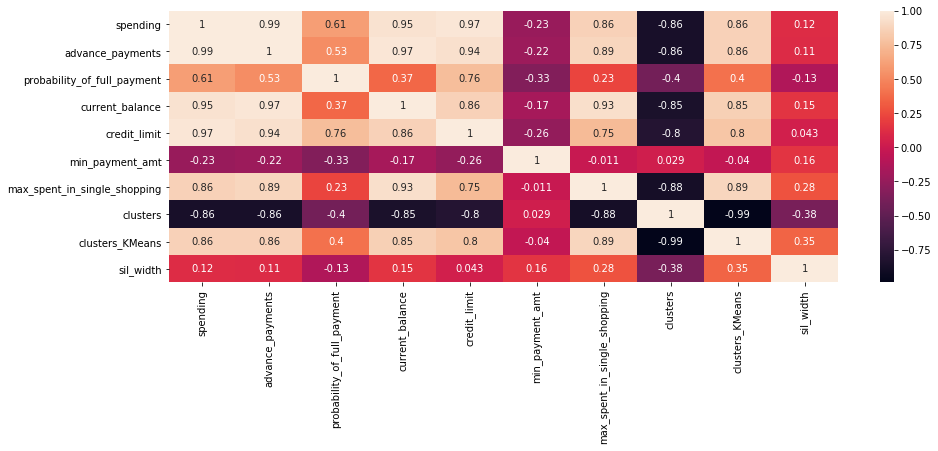

In [238]:
plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot=True)

cluster 0 has lower range of values for spending, advance payment, max_spent_in_single shopping, credit limit, current balance compared to cluster 1